<a href="https://colab.research.google.com/github/Sukhdeep2006/Learning-TensorFlow/blob/main/008_TF_NaturalLanguageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

### Tokenisation is a key aspect the Natural Language Processing using the machine learning algorithms.

For more on Tokenisation in NLP refer to the link:

https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/

### Import the tokenizer

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd

Lets write some sample text

In [ ]:
sentences = [
    'My favorite food is ice cream',
    'do you like ice cream too?',
    'My dog likes ice cream!',
    "your favorite flavor of icecream is chocolate",
    "chocolate isn't good for dogs",
    "your dog, your cat, and your parrot prefer broccoli"
]

### Tokenize the words:

The first step to preparing text to be used in a machine learning model is to tokenize the text, in other words, to generate numbers for the words.

The following peice of code will define our dictionary and assign a unique number to all the words we are expected to work with, in our model.

In [ ]:
tokenizer = Tokenizer(num_words = 100, oov_token = '<oov>')
tokenizer.fit_on_texts(sentences)
my_dictionary = tokenizer.word_index
print(my_dictionary)

print('\n The number assigned to the word FAVORITE is {}'.format(my_dictionary['favorite']))

{'<oov>': 1, 'your': 2, 'ice': 3, 'cream': 4, 'my': 5, 'favorite': 6, 'is': 7, 'dog': 8, 'chocolate': 9, 'food': 10, 'do': 11, 'you': 12, 'like': 13, 'too': 14, 'likes': 15, 'flavor': 16, 'of': 17, 'icecream': 18, "isn't": 19, 'good': 20, 'for': 21, 'dogs': 22, 'cat': 23, 'and': 24, 'parrot': 25, 'prefer': 26, 'broccoli': 27}

 The number assigned to the word FAVORITE is 6


### The next step is to generate the sequences, so that we can work with the numbers instead of actual text while defining our machine learning algorithms

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences_padded = pad_sequences(sequences, maxlen = 15, padding='post', truncating='post')

print(sequences)
print('\n', sequences_padded)

[[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]

 [[ 5  6 10  7  3  4  0  0  0  0  0  0  0  0  0]
 [11 12 13  3  4 14  0  0  0  0  0  0  0  0  0]
 [ 5  8 15  3  4  0  0  0  0  0  0  0  0  0  0]
 [ 2  6 16 17 18  7  9  0  0  0  0  0  0  0  0]
 [ 9 19 20 21 22  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  2 23 24  2 25 26 27  0  0  0  0  0  0]]


### Lets create some sentences using the words whihc are not defined in our dictionary/tokenization. You would notice that all these words are represented by the number 1 whihc is a token for "out of the vocabulary" words.

In [ ]:
sentences2 = ["I like hot chocolate", "My dogs and my hedgehog like kibble but my squirrel prefers grapes and my chickens like ice cream, preferably vanilla"]

sequences2 = tokenizer.texts_to_sequences(sentences2)
sequences2_padded = pad_sequences(sequences2, maxlen = 15, padding='post', truncating='post')

print(sequences2)
print(sequences2_padded)

[[1, 13, 1, 9], [5, 22, 24, 5, 1, 13, 1, 1, 5, 1, 1, 1, 24, 5, 1, 13, 3, 4, 1, 1]]
[[ 1 13  1  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 22 24  5  1 13  1  1  5  1  1  1 24  5  1]]


# Its now time to work with the a larger dataset of text to explore Word Embeddings and Sentiments Analysis

## Tokenize the text

Create the tokenizer, specify the OOV token, tokenize the text, then inspect the word index.

### Import the required functions and libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd

### Get the data and create a dataset out of it.

In [ ]:
path = tf.keras.utils.get_file('sentiments.csv', 'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')

139264/127831 [================================] - 0s 0us/step


In [ ]:
dataset = pd.read_csv(path)
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

training_size = int(len(sentences)* 0.8)

training_sentences  = np.array(sentences[0:training_size])
testing_sentences  = np.array(sentences[training_size:])

training_labels  = np.array(labels[0:training_size])
testing_labels  = np.array(labels[training_size:])

#print(type(testing_labels))

### Tokenize the dataset

In [ ]:
vocab_size = 1000
pad_type = 'post'
trunc_type = 'post'
oov_tok = '<OOV>'
embedding_dim = 16
max_length = 100

tokenizer =  Tokenizer(num_words= vocab_size , oov_token= oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding=pad_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding=pad_type, truncating=trunc_type)


### Lets review the sequences once...

In [ ]:
print(training_sentences[0])
print(training_padded[0])

So there is no way for me to plug it in here in the US unless I go by a converter.
[ 26  68   7  63 173  13  67   8 218   5  16  82  16   2 197 363   4  75
 109   6   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print(word_index['phone'])
print(reverse_word_index[15])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(training_padded[1]))
print(training_sentences[1])

15
phone
good case excellent value ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Good case Excellent value.


### Now is the time to train a basic sentiment model with embeddings.

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length = max_length),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(6, activation='relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9606      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history = model.fit(training_padded,training_labels, epochs= num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/50
50/50 [==============================] - 4s 11ms/step - loss: 0.6925 - accuracy: 0.5223 - val_loss: 0.7017 - val_accuracy: 0.4110
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6813 - accuracy: 0.5474 - val_loss: 0.6947 - val_accuracy: 0.4461
Epoch 3/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6461 - accuracy: 0.7037 - val_loss: 0.6773 - val_accuracy: 0.5188
Epoch 4/50
50/50 [==============================] - 0s 7ms/step - loss: 0.5506 - accuracy: 0.8154 - val_loss: 0.5847 - val_accuracy: 0.7293
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: 0.4145 - accuracy: 0.8920 - val_loss: 0.5200 - val_accuracy: 0.7469
Epoch 6/50
50/50 [==============================] - 0s 7ms/step - loss: 0.3009 - accuracy: 0.9272 - val_loss: 0.5281 - val_accuracy: 0.7393
Epoch 7/50
50/50 [==============================] - 0s 7ms/step - loss: 0.2207 - accuracy: 0.9422 - val_loss: 0.5186 - val_accuracy: 0.7393
Epoch 8/50
50/50 [=

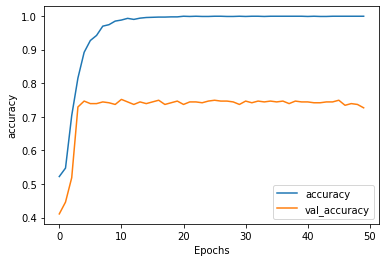

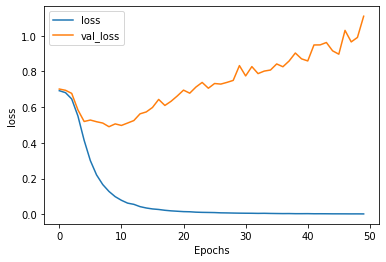

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Get files for visualizing the network  
The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the "Sphereize" checkbox.

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs1.tsv', 'w', encoding='utf-8')
out_m = io.open('meta1.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs1.tsv')
  files.download('meta1.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Predicting Sentiment in New Reviews   

Now that you've trained and visualized your network, take a look below at how we can predict sentiment in new reviews the network has never seen before.

In [ ]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'there is nothing to complain about',
                'they gave us free chocolate cake', 
                'they did not charge us for the cake.', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length) 

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'there is nothing to complain about', 'they gave us free chocolate cake', 'they did not charge us for the cake.', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!



In [ ]:
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')


I love this phone
[0.99998176]


I hate spaghetti
[0.00015392]


Everything was cold
[0.00426392]


Everything was hot exactly as I wanted
[0.08989736]


Everything was green
[0.02919167]


the host seated us immediately
[0.9999182]


there is nothing to complain about
[0.00461441]


they gave us free chocolate cake
[0.9997273]


they did not charge us for the cake.
[0.94430906]


not sure about the wilted flowers on the table
[0.00024078]


only works when I stand on tippy toes
[0.99992764]


does not work when I stand on my head
[2.1181067e-05]




## Tweaking the Model   

### Lets see how might changing the vocab_size, embedding_dim or max_length affect how the model performs?

In [ ]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Train a Sentiment Model (with tweaks!)   

We'll use a slightly different model here, using GlobalAveragePooling1D instead of Flatten().

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
history_2 = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels))

Epoch 1/70
50/50 [==============================] - 1s 10ms/step - loss: 0.6919 - accuracy: 0.5223 - val_loss: 0.6994 - val_accuracy: 0.4110
Epoch 2/70
50/50 [==============================] - 0s 7ms/step - loss: 0.6899 - accuracy: 0.5223 - val_loss: 0.7001 - val_accuracy: 0.4110
Epoch 3/70
50/50 [==============================] - 0s 7ms/step - loss: 0.6874 - accuracy: 0.5223 - val_loss: 0.6980 - val_accuracy: 0.4110
Epoch 4/70
50/50 [==============================] - 0s 6ms/step - loss: 0.6837 - accuracy: 0.5355 - val_loss: 0.6958 - val_accuracy: 0.4361
Epoch 5/70
50/50 [==============================] - 0s 6ms/step - loss: 0.6776 - accuracy: 0.5436 - val_loss: 0.6883 - val_accuracy: 0.4987
Epoch 6/70
50/50 [==============================] - 0s 7ms/step - loss: 0.6670 - accuracy: 0.5863 - val_loss: 0.6779 - val_accuracy: 0.5614
Epoch 7/70
50/50 [==============================] - 0s 7ms/step - loss: 0.6515 - accuracy: 0.6667 - val_loss: 0.6746 - val_accuracy: 0.5213
Epoch 8/70
50/50 [=

### Visualize the training graph   
You can use the code below to visualize the training and validation accuracy while you try out different tweaks to the hyperparameters and model.

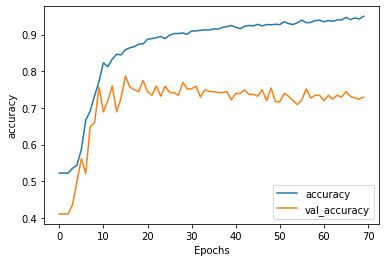

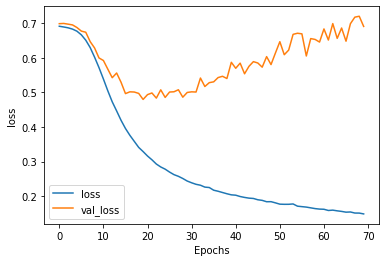

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

## Get files for visualizing the network  
The code below will download two files for visualizing how your network "sees" the sentiment related to each word. Head to http://projector.tensorflow.org/ and load these files, then click the checkbox to "sphereize" the data.
   
Note: You may run into errors with the projection if your vocab_size earlier was larger than the actual number of words in the vocabulary, in which case you'll need to decrease this variable and re-train in order to visualize.

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(500, 16)


In [ ]:
import io

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs2.tsv', 'w', encoding='utf-8')
out_m = io.open('meta2.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs2.tsv')
  files.download('meta2.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Predicting Sentiment in New Reviews   
Below, we've again included some example new reviews you can test your results on.

In [ ]:
# Use the model to predict a review   
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'there is nothing to complain about',
                'they gave us free chocolate cake', 
                'they did not charge us for the cake.', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

print(fake_reviews) 

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')

# Try adding reviews of your own
# Add some negative words (such as "not") to the good reviews and see what happens
# For example:
# they gave us free chocolate cake and did not charge us

['I love this phone', 'I hate spaghetti', 'Everything was cold', 'Everything was hot exactly as I wanted', 'Everything was green', 'the host seated us immediately', 'there is nothing to complain about', 'they gave us free chocolate cake', 'they did not charge us for the cake.', 'not sure about the wilted flowers on the table', 'only works when I stand on tippy toes', 'does not work when I stand on my head']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.99385506]


I hate spaghetti
[0.0128457]


Everything was cold
[0.6479407]


Everything was hot exactly as I wanted
[0.3368024]


Everything was green
[0.6479407]


the host seated us immediately
[0.8507685]


there is nothing to complain about
[0.02290468]


they gave us free chocolate cake
[0.99523586]


they did not charge us for the cake.
[0.2833717]


not sure about the wilted flowers on the table
[0.00943192]


only works when I stand on tippy toes
[0.9924954]


does not work when

### Not very impressive results after tweaking the vocab size, sequence length and the model structure. 

Lets now try to use the subwords instead of the full words and see if that makes any differece.

We will continue to use the same dataset but this time we will break the text into sub words.

In [ ]:
#path = tf.keras.utils.get_file('sentiments.csv', 'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')

#dataset = pd.read_csv(path)
sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

print(len(sentences), len(labels))



1992 1992


### We already have the sentences and lables from the dataset we worked upon.
Lets create the subwords dataset, to work with now.

In [ ]:
import tensorflow_datasets as tfds

vocab_size = 1000
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size,max_subword_length =5)

In [ ]:
# Lets check if our tokenizer worked appropriately.

num =5
print(sentences[num])
encoded  = tokenizer.encode(sentences[num])
print(encoded)

for i in encoded:
  print(tokenizer.decode([i]))

I have to jiggle the plug to get it to line up right to get decent volume.
[4, 31, 6, 849, 162, 450, 12, 1, 600, 438, 775, 6, 175, 14, 6, 55, 213, 159, 474, 775, 6, 175, 614, 380, 295, 148, 72, 789]
I 
have 
to 
j
ig
gl
e 
the 
pl
ug
 
to 
get 
it 
to 
li
ne 
up 
right
 
to 
get 
dec
ent 
vo
lu
me
.


## Replace sentence data with encoded subwords   
### Now, we'll re-create the dataset to be used for training by actually encoding each of the individual sentences. This is equivalent to text_to_sequences with the Tokenizer we used in earlier exercises.

In [ ]:
print(sentences[1])

enc_sentences = []
for i, sentence in enumerate(sentences):
  enc_sentences.append(tokenizer.encode(sentence))

print(enc_sentences[1])

Good case Excellent value.
[625, 677, 626, 274, 380, 633, 148, 844, 789]


## Final pre-processing   

Before training, we still need to pad the sequences, as well as split into training and test sets.

In [ ]:
import numpy as np

max_length = 50
trunc_type = 'post'
padding_type = 'post'

senetences_padded = pad_sequences(enc_sentences, padding=padding_type,truncating=trunc_type, maxlen=max_length)

training_size = int(len(sentences) * 0.8)
training_sentences = np.array(senetences_padded[0:training_size])
testing_sentences = np.array(senetences_padded[training_size:])

training_labels = np.array(labels[0:training_size])
testing_labels = np.array(labels[training_size:])


print(len(training_sentences),len(testing_sentences),len(training_labels),len(testing_labels))

1593 399 1593 399


### Lets train a sentiment Model using the subwords encoding

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_sentences, training_labels, epochs=num_epochs, 
                    validation_data=(testing_sentences, testing_labels))

Epoch 1/50
50/50 [==============================] - 1s 10ms/step - loss: 0.6897 - accuracy: 0.5229 - val_loss: 0.6983 - val_accuracy: 0.4160
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6849 - accuracy: 0.5549 - val_loss: 0.6919 - val_accuracy: 0.4912
Epoch 3/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6755 - accuracy: 0.6139 - val_loss: 0.6839 - val_accuracy: 0.5288
Epoch 4/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6605 - accuracy: 0.6742 - val_loss: 0.6647 - val_accuracy: 0.6792
Epoch 5/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6396 - accuracy: 0.7451 - val_loss: 0.6526 - val_accuracy: 0.6591
Epoch 6/50
50/50 [==============================] - 0s 7ms/step - loss: 0.6115 - accuracy: 0.7847 - val_loss: 0.6218 - val_accuracy: 0.7694
Epoch 7/50
50/50 [==============================] - 0s 7ms/step - loss: 0.5800 - accuracy: 0.8054 - val_loss: 0.6037 - val_accuracy: 0.7669
Epoch 8/50
50/50 [=

### Visualize the Training Graph   
We can visualize the training graph below again. Does there appear to be a difference in how validation accuracy and loss is trending compared to with full words?

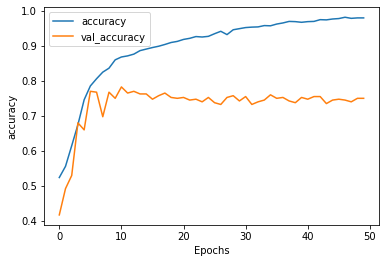

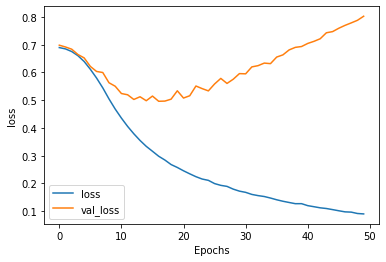

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

### Get files for visualizing the network   
Once again, you can visualize the sentiment related to all of the subwords using the below code and by heading to http://projector.tensorflow.org/ to upload and view the data.

Note that the below code does have a few small changes to handle the different way text is encoded in our dataset compared to before with the built in Tokenizer.

You may get an error like "Number of tensors (999) do not match the number of lines in metadata (992)." As long as you load the vectors first without error and wait a few seconds after this pops up, you will be able to click outside the file load menu and still view the visualization.

In [ ]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(1000, 16)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(0, vocab_size - 1):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

### Honestly, this is not making much sense. The main reason for using subwords is to make sure our model is able to identify at least some parts of the words unknown to it so far. But to make sense out of the words, the sequence/context is required too. We will see in the next notebok how to use a sequence model to improve the performance.